# 第4章 NumPy基础：数组和矢量计算

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Numpy数组运算

In [2]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [3]:
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [4]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [5]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [6]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [7]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

### 大小相同的数组之间的比较会生成布尔值的数组

In [8]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [9]:
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [10]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

### 不同大小的数组之间的运算叫做广播（broadcasting）

## 基本的索引和切片

In [11]:
arr3 = np.arange(10)

In [12]:
arr3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
arr3[5]

5

In [14]:
arr3[5:8]

array([5, 6, 7])

In [15]:
arr3[5:8] = 12

In [16]:
arr3

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

### 数组切片是原始数组的视图，这意味着数据不会被复制，视图上的任何修改都会直接反映到源数据上

In [17]:
arr3_slice = arr3[5:8]

In [18]:
arr3_slice

array([12, 12, 12])

In [19]:
arr3_slice[1] = 12345

In [20]:
arr3

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [21]:
arr3_slice[:] = 64

In [22]:
arr3

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

### 如果想要得到的是ndarray切片的一份副本而非视图，就需要明确的进行复制操作

### arr3[5:8].copy()

In [23]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [24]:
arr2d[2]

array([7, 8, 9])

### 下面两种方式是等价的

In [25]:
arr2d[0][2]

3

In [26]:
arr2d[0, 2]

3

### 2*2*3数组

In [27]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [28]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### arr3d[0]是一个2*3数组

In [29]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
old_values = arr3d[0].copy()

In [31]:
arr3d[0] = 42

In [32]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
arr3d[1, 0]

array([7, 8, 9])

In [34]:
x = arr3d[1]

In [35]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [36]:
x[0]

array([7, 8, 9])

## 切片索引

In [37]:
arr3

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [38]:
arr3[1:6]

array([ 1,  2,  3,  4, 64])

In [39]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [40]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [42]:
arr2d[1, :2]

array([4, 5])

In [43]:
arr2d[:2, 2]

array([3, 6])

In [44]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### 对切片的赋值操作也会扩散到整个区域

In [45]:
arr2d[:2, 1:] = 0

In [46]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 布尔型索引

In [47]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [48]:
data = np.random.randn(7, 4)

In [49]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [50]:
data

array([[ 0.17058013,  0.12587916,  0.3651723 ,  0.32634604],
       [-0.06476479, -0.56324383,  1.23828562,  0.68634643],
       [-0.21890289, -0.68612033, -0.46030694, -0.67948249],
       [ 0.8182447 , -2.25716805,  0.7912914 ,  0.17942513],
       [ 0.43957617,  0.09938437, -0.77922365,  0.79271709],
       [ 0.67954549, -1.57851544, -0.0674037 ,  2.22507361],
       [ 2.4045666 ,  0.56306207, -0.59028979, -1.18842401]])

In [51]:
names =='Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [52]:
data[names == 'Bob']

array([[ 0.17058013,  0.12587916,  0.3651723 ,  0.32634604],
       [ 0.8182447 , -2.25716805,  0.7912914 ,  0.17942513]])

In [53]:
data[names == 'Bob', 2:]

array([[ 0.3651723 ,  0.32634604],
       [ 0.7912914 ,  0.17942513]])

In [54]:
data[names == 'Bob', 3]

array([ 0.32634604,  0.17942513])

In [55]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [56]:
data[names != 'Bob']

array([[-0.06476479, -0.56324383,  1.23828562,  0.68634643],
       [-0.21890289, -0.68612033, -0.46030694, -0.67948249],
       [ 0.43957617,  0.09938437, -0.77922365,  0.79271709],
       [ 0.67954549, -1.57851544, -0.0674037 ,  2.22507361],
       [ 2.4045666 ,  0.56306207, -0.59028979, -1.18842401]])

In [57]:
data[~(names != 'Bob')]

array([[ 0.17058013,  0.12587916,  0.3651723 ,  0.32634604],
       [ 0.8182447 , -2.25716805,  0.7912914 ,  0.17942513]])

In [58]:
cond = names == 'Bob'

In [59]:
data[~cond]

array([[-0.06476479, -0.56324383,  1.23828562,  0.68634643],
       [-0.21890289, -0.68612033, -0.46030694, -0.67948249],
       [ 0.43957617,  0.09938437, -0.77922365,  0.79271709],
       [ 0.67954549, -1.57851544, -0.0674037 ,  2.22507361],
       [ 2.4045666 ,  0.56306207, -0.59028979, -1.18842401]])

In [60]:
mask = (names == 'Bob') | (names == 'Will')

In [61]:
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [62]:
data[mask]

array([[ 0.17058013,  0.12587916,  0.3651723 ,  0.32634604],
       [-0.21890289, -0.68612033, -0.46030694, -0.67948249],
       [ 0.8182447 , -2.25716805,  0.7912914 ,  0.17942513],
       [ 0.43957617,  0.09938437, -0.77922365,  0.79271709]])

In [63]:
data[data < 0] = 0

In [64]:
data

array([[ 0.17058013,  0.12587916,  0.3651723 ,  0.32634604],
       [ 0.        ,  0.        ,  1.23828562,  0.68634643],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.8182447 ,  0.        ,  0.7912914 ,  0.17942513],
       [ 0.43957617,  0.09938437,  0.        ,  0.79271709],
       [ 0.67954549,  0.        ,  0.        ,  2.22507361],
       [ 2.4045666 ,  0.56306207,  0.        ,  0.        ]])

In [65]:
data[names != 'Joe'] = 7

In [66]:
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.        ,  1.23828562,  0.68634643],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.67954549,  0.        ,  0.        ,  2.22507361],
       [ 2.4045666 ,  0.56306207,  0.        ,  0.        ]])

### 花式索引 Fancy indexing

In [67]:
arrf = np.empty((8, 4))

In [68]:
arrf

array([[  0.00000000e+000,   0.00000000e+000,   1.13231944e-311,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          1.13229429e-311],
       [  0.00000000e+000,   1.13231854e-311,   0.00000000e+000,
          1.13231946e-311],
       [  0.00000000e+000,   1.13231941e-311,   0.00000000e+000,
          9.89509023e-315],
       [  0.00000000e+000,   9.89635868e-315,   0.00000000e+000,
          1.13231945e-311],
       [  1.13231946e-311,   0.00000000e+000,   1.13231941e-311,
          1.13231847e-311],
       [  1.13227247e-311,   0.00000000e+000,   9.89634619e-315,
          0.00000000e+000],
       [  9.89635583e-315,   9.89634619e-315,   0.00000000e+000,
          0.00000000e+000]])

In [69]:
for i in range(8):
    arrf[i] = i
    

In [70]:
arrf

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [71]:
arrf[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [72]:
arrf[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [73]:
arrr = np.arange(32).reshape((8, 4))

In [74]:
arrr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [75]:
arrr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [76]:
arrr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 记住索引跟切片不一样，它总是将数据复制到新数组中

## 数组转置与轴对换

In [77]:
arrt = np.arange(15).reshape(3, 5)

In [78]:
arrt

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
arrt.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [80]:
np.dot(arrt.T, arrt)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

### 对于高维数组，transpose

In [81]:
arrts = np.arange(16).reshape((2, 2, 4))

In [82]:
arrts

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [83]:
arrts.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [84]:
arrts

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [85]:
arrts.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数，快速的元素级数组函数

In [86]:
arrk = np.arange(10)

In [87]:
arrk

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
np.sqrt(arrk)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [90]:
np.exp(arrk)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [91]:
xk = np.random.randn(8)

In [92]:
yk = np.random.randn(8)

In [93]:
xk

array([ 1.62897888, -1.96276668, -0.70277778,  0.96227564,  1.42431626,
        0.4616483 ,  0.51865063,  1.3035989 ])

In [94]:
yk

array([-0.16851015, -0.41827521, -1.46701517,  0.10501715,  1.35957522,
       -1.31857512,  0.34773291, -1.84109333])

In [96]:
np.maximum(xk, yk)

array([ 1.62897888, -0.41827521, -0.70277778,  0.96227564,  1.42431626,
        0.4616483 ,  0.51865063,  1.3035989 ])

### 利用数组进行数据处理

In [97]:
points = np.arange(-5, 5, 0.01)

In [98]:
xs, ys = np.meshgrid(points, points)

In [99]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [100]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [101]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [107]:
import matplotlib.pyplot as plt

In [108]:
%matplotlib inline

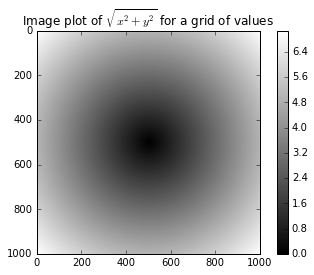

In [111]:
plt.imshow(z, cmap=plt.cm.gray);
plt.colorbar();
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算

In [112]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [113]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [114]:
cond = np.array([True, False, True, True, False])

In [115]:
result1 = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [116]:
result1

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [117]:
result2 = np.where(cond, xarr, yarr)

In [118]:
result2

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [119]:
arrw = np.random.randn(4, 4)

In [120]:
arrw

array([[-0.20814943, -0.30122805, -0.41944111, -0.63600859],
       [-1.05573018, -0.44870115, -0.86090346,  1.18010439],
       [-0.95071752, -2.32488348, -0.10504606,  1.72176824],
       [ 1.21977636,  1.06280931, -1.16643218, -1.13852448]])

In [121]:
arrw > 0

array([[False, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [ True,  True, False, False]], dtype=bool)

In [123]:
np.where(arrw>0, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [-2, -2, -2,  2],
       [ 2,  2, -2, -2]])

In [124]:
np.where(arrw>0, 2, arrw)

array([[-0.20814943, -0.30122805, -0.41944111, -0.63600859],
       [-1.05573018, -0.44870115, -0.86090346,  2.        ],
       [-0.95071752, -2.32488348, -0.10504606,  2.        ],
       [ 2.        ,  2.        , -1.16643218, -1.13852448]])

### 数学和统计方法

In [125]:
arrt = np.random.randn(5, 4)

In [126]:
arrt

array([[ 2.14452062,  0.16178968,  0.37522421,  0.88897723],
       [ 0.26909688, -0.62381618, -0.13351321, -0.57225349],
       [-0.91768707, -0.05170602, -0.16644872,  1.01562268],
       [-1.38364425, -0.05084699, -0.24281047,  0.51262806],
       [ 0.62091442, -1.7733081 , -0.48765279,  0.51214487]])

In [127]:
arrt.mean()

0.0048615680019591266

In [128]:
np.mean(arrt)

0.0048615680019591266

In [129]:
arrt.sum()

0.097231360039182535

In [130]:
arrt.mean(axis=1)

array([ 0.89262794, -0.2651215 , -0.03005478, -0.29116841, -0.2819754 ])

In [131]:
arrt.sum(axis=0)

array([ 0.73320061, -2.33788762, -0.65520097,  2.35711934])

In [132]:
arrc = np.arange(8)

In [133]:
arrc

array([0, 1, 2, 3, 4, 5, 6, 7])

In [134]:
arrc.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

### 用于布尔型数组的方法

In [135]:
arrb = np.random.randn(100)

In [136]:
(arr>0).sum()

6

In [137]:
bools = np.array([False, False, True, False])

In [138]:
bools.any()

True

In [139]:
bools.all()

False

### 排序

In [140]:
arrp = np.random.randn(6)

In [141]:
arrp

array([-0.68738316, -0.10273629, -0.58921799,  0.7375715 , -0.91887477,
        0.78447126])

In [142]:
arrp.sort()

In [143]:
arrp

array([-0.91887477, -0.68738316, -0.58921799, -0.10273629,  0.7375715 ,
        0.78447126])

### 唯一化以及其他的集合逻辑

In [144]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [145]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [146]:
sorted(set(names))

['Bob', 'Joe', 'Will']

### 用于数组的文件输入和输出 np.save 和 np.load

In [147]:
arrsl = np.arange(10)

In [148]:
np.save('some_array', arrsl)

In [149]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 线性代数

In [150]:
xx = np.array([[1., 2., 3.], [4., 5., 6.]])

In [151]:
yx = np.array([[6., 23.], [-1., 7.], [8, 9]])

In [152]:
xx

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [153]:
yx

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [155]:
xx.dot(yx)

array([[  28.,   64.],
       [  67.,  181.]])

In [156]:
np.dot(xx, yx)

array([[  28.,   64.],
       [  67.,  181.]])

In [157]:
np.dot(x, np.ones(3))

array([ 24.,  33.])

In [158]:
from numpy.linalg import inv, qr

In [159]:
X = np.random.randn(5, 5)

In [160]:
mat = X.T.dot(X)

In [161]:
inv(mat)

array([[ 2.1816559 ,  1.72050347, -0.31350742,  0.57757046, -1.75779126],
       [ 1.72050347,  1.56556073, -0.25459966,  0.57712102, -1.4720537 ],
       [-0.31350742, -0.25459966,  0.14823258, -0.06206955,  0.12406061],
       [ 0.57757046,  0.57712102, -0.06206955,  0.55489706, -0.67209874],
       [-1.75779126, -1.4720537 ,  0.12406061, -0.67209874,  2.04903655]])

In [162]:
mat.dot(inv(mat))

array([[  1.00000000e+00,   5.14734040e-16,   2.10697806e-16,
          1.51210430e-16,  -5.05225085e-16],
       [ -1.96197583e-16,   1.00000000e+00,   7.01567106e-17,
         -4.67101339e-16,   4.72527783e-16],
       [  3.35150319e-16,   1.75690469e-15,   1.00000000e+00,
         -2.81700450e-17,  -2.31853016e-15],
       [ -3.59375101e-16,   1.89034748e-16,   3.17754879e-17,
          1.00000000e+00,   3.51357372e-16],
       [ -1.78956278e-16,  -2.37436628e-16,   7.60739314e-17,
         -3.67013265e-17,   1.00000000e+00]])

In [163]:
q, r = qr(mat)

In [164]:
r

array([[ -7.20957199,   4.95294062,  -8.18624672,  -2.64616346,
         -3.12188332],
       [  0.        ,  -5.4729943 , -10.91065276,   0.92869209,
         -3.13163015],
       [  0.        ,   0.        ,  -4.50509172,  -0.09435556,
          0.52863012],
       [  0.        ,   0.        ,   0.        ,  -3.04922759,
         -1.11324929],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.31746143]])

### 伪随机数生成

In [165]:
samples = np.random.normal(size=(4, 4))

In [166]:
samples

array([[-0.44428004,  0.51301201,  1.53197026,  1.37409693],
       [ 1.20708947, -0.42521429, -1.50976923, -0.16241703],
       [-0.29468751,  1.29660846, -1.22093104,  0.24794897],
       [ 1.31959966,  1.62707672,  0.05437156,  1.95999725]])

In [168]:
from random import normalvariate as nv

In [169]:
N = 1000000

In [170]:
%timeit samples = [nv(0, 1) for _ in range(N)]

1 loop, best of 3: 1.08 s per loop


In [171]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 36.7 ms per loop


## 示例：随机漫步

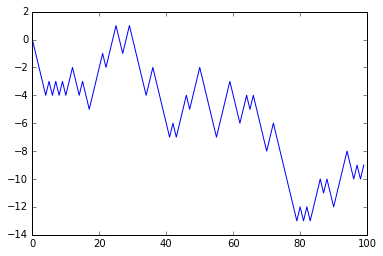

In [173]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

In [174]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
stepsn = np.where(draws > 0, 1, -1)
walkn = stepsn.cumsum()

In [175]:
walkn.min()

-12

In [177]:
walkn.max()

36

In [178]:
np.abs(walkn >= 10).argmax()

99